In [485]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("kc_house_data.csv")
df.shape

(21613, 21)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [487]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


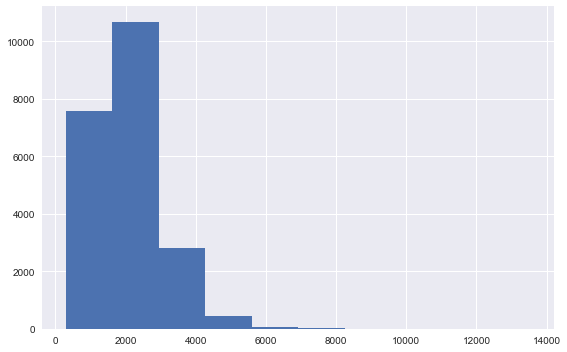

In [488]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
ax.hist(df.sqft_living)
plt.tight_layout()


In [489]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [490]:
df = df[['price','bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','sqft_living15','yr_built','yr_renovated','zipcode']]
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1340,1955,0,98178
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1690,1951,1991,98125
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,2720,1933,0,98028
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1360,1965,0,98136
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1800,1987,0,98074


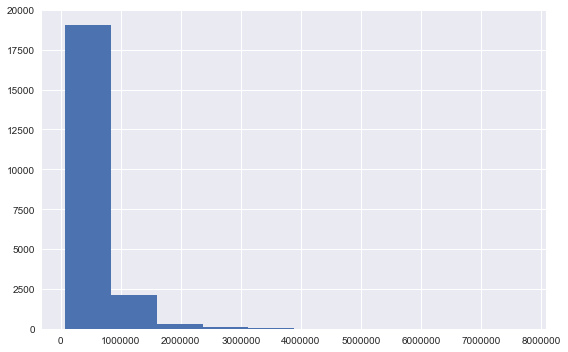

In [491]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
plt.hist(df.price)
plt.tight_layout()

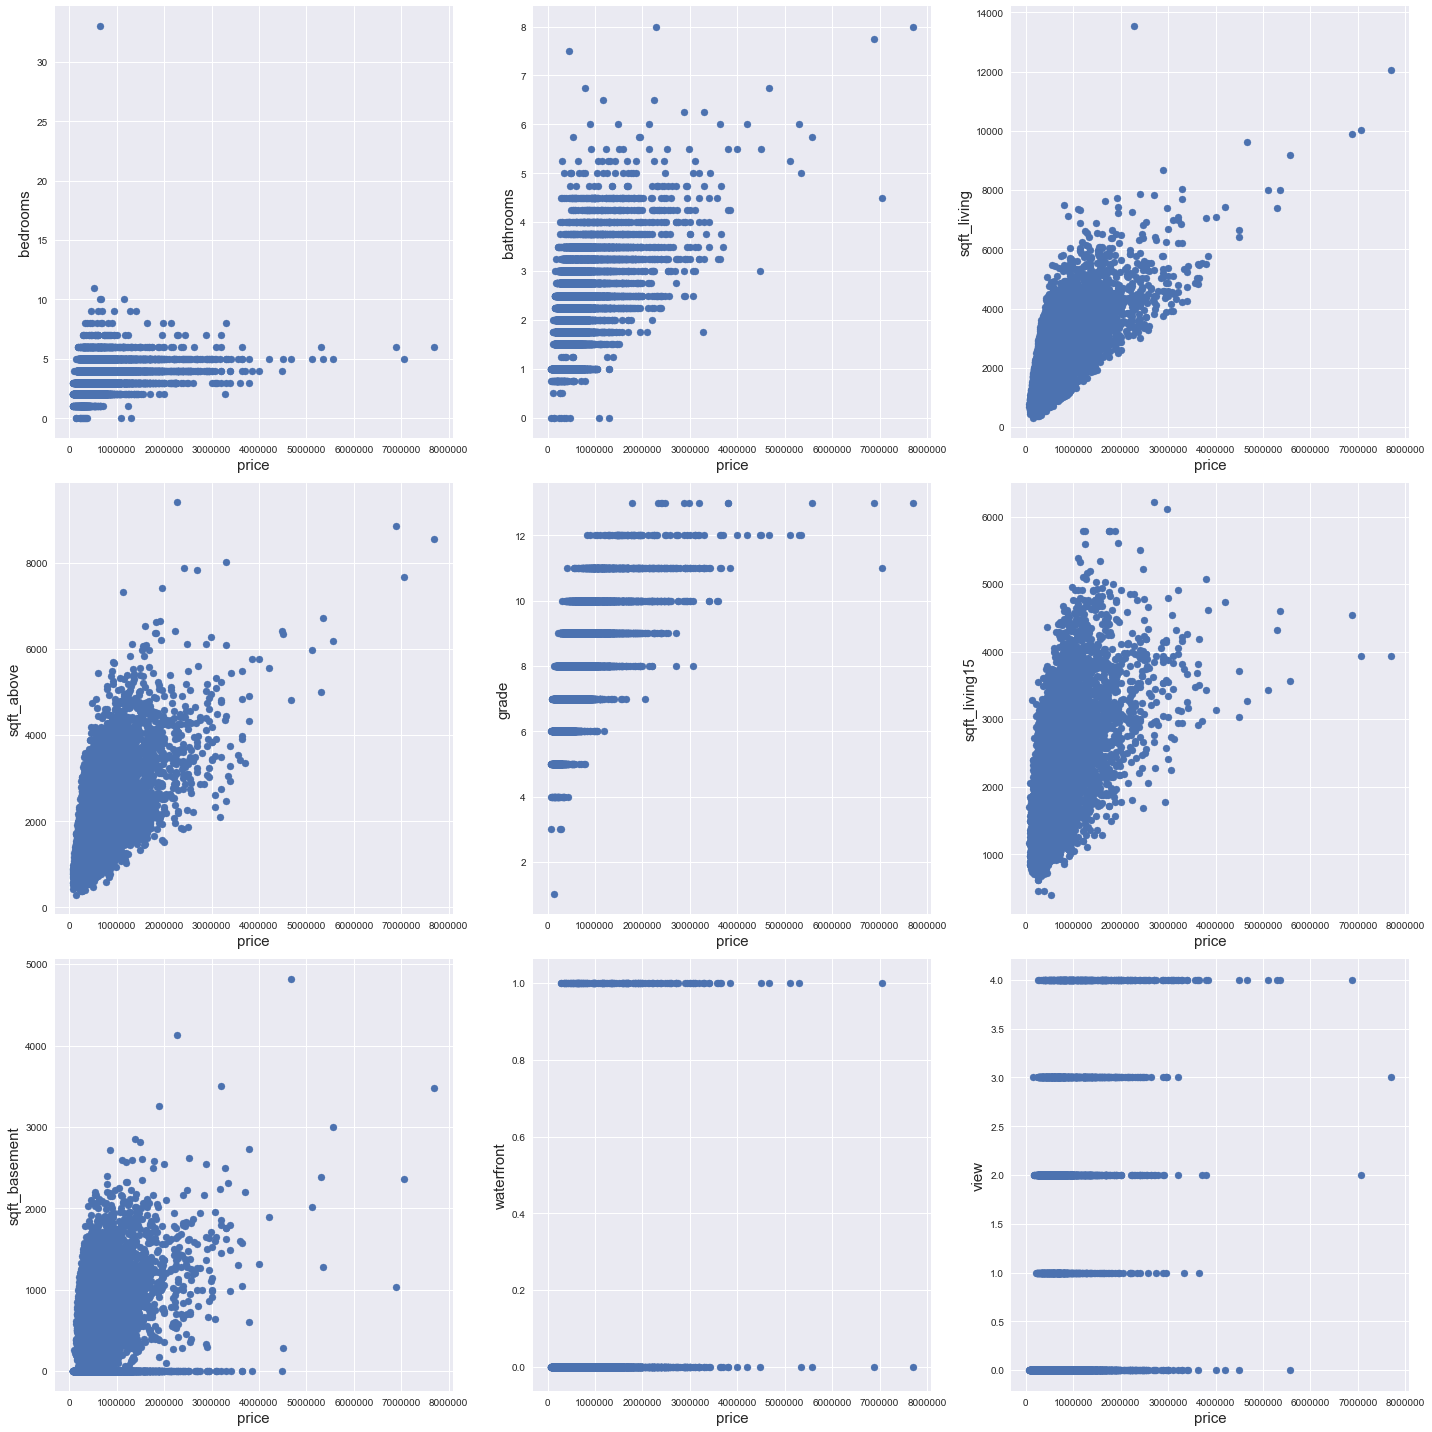

In [492]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(331)
ax1.scatter(df.price,df.bedrooms)
ax1.set_ylabel('bedrooms', fontsize = 15)
ax1.set_xlabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(332)
ax2.scatter(df.price,df.bathrooms)
ax2.set_ylabel('bathrooms', fontsize = 15)
ax2.set_xlabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(333)
ax3.scatter(df.price,df.sqft_living)
ax3.set_ylabel('sqft_living', fontsize = 15)
ax3.set_xlabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(334)
ax4.scatter(df.price,df.sqft_above)
ax4.set_ylabel('sqft_above', fontsize = 15)
ax4.set_xlabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(335)
ax5.scatter(df.price,df.grade)
ax5.set_ylabel('grade', fontsize = 15)
ax5.set_xlabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(336)
ax6.scatter(df.price,df.sqft_living15)
ax6.set_ylabel('sqft_living15', fontsize = 15)
ax6.set_xlabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(337)
ax7.scatter(df.price,df.sqft_basement)
ax7.set_ylabel('sqft_basement', fontsize = 15)
ax7.set_xlabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(338)
ax8.scatter(df.price,df.waterfront)
ax8.set_ylabel('waterfront', fontsize = 15)
ax8.set_xlabel('price', fontsize = 15)

#9
ax9 = fig.add_subplot(339)
ax9.scatter(df.price,df.view)
ax9.set_ylabel('view', fontsize = 15)
ax9.set_xlabel('price', fontsize = 15)


plt.tight_layout()
fig.savefig('House_price.png')

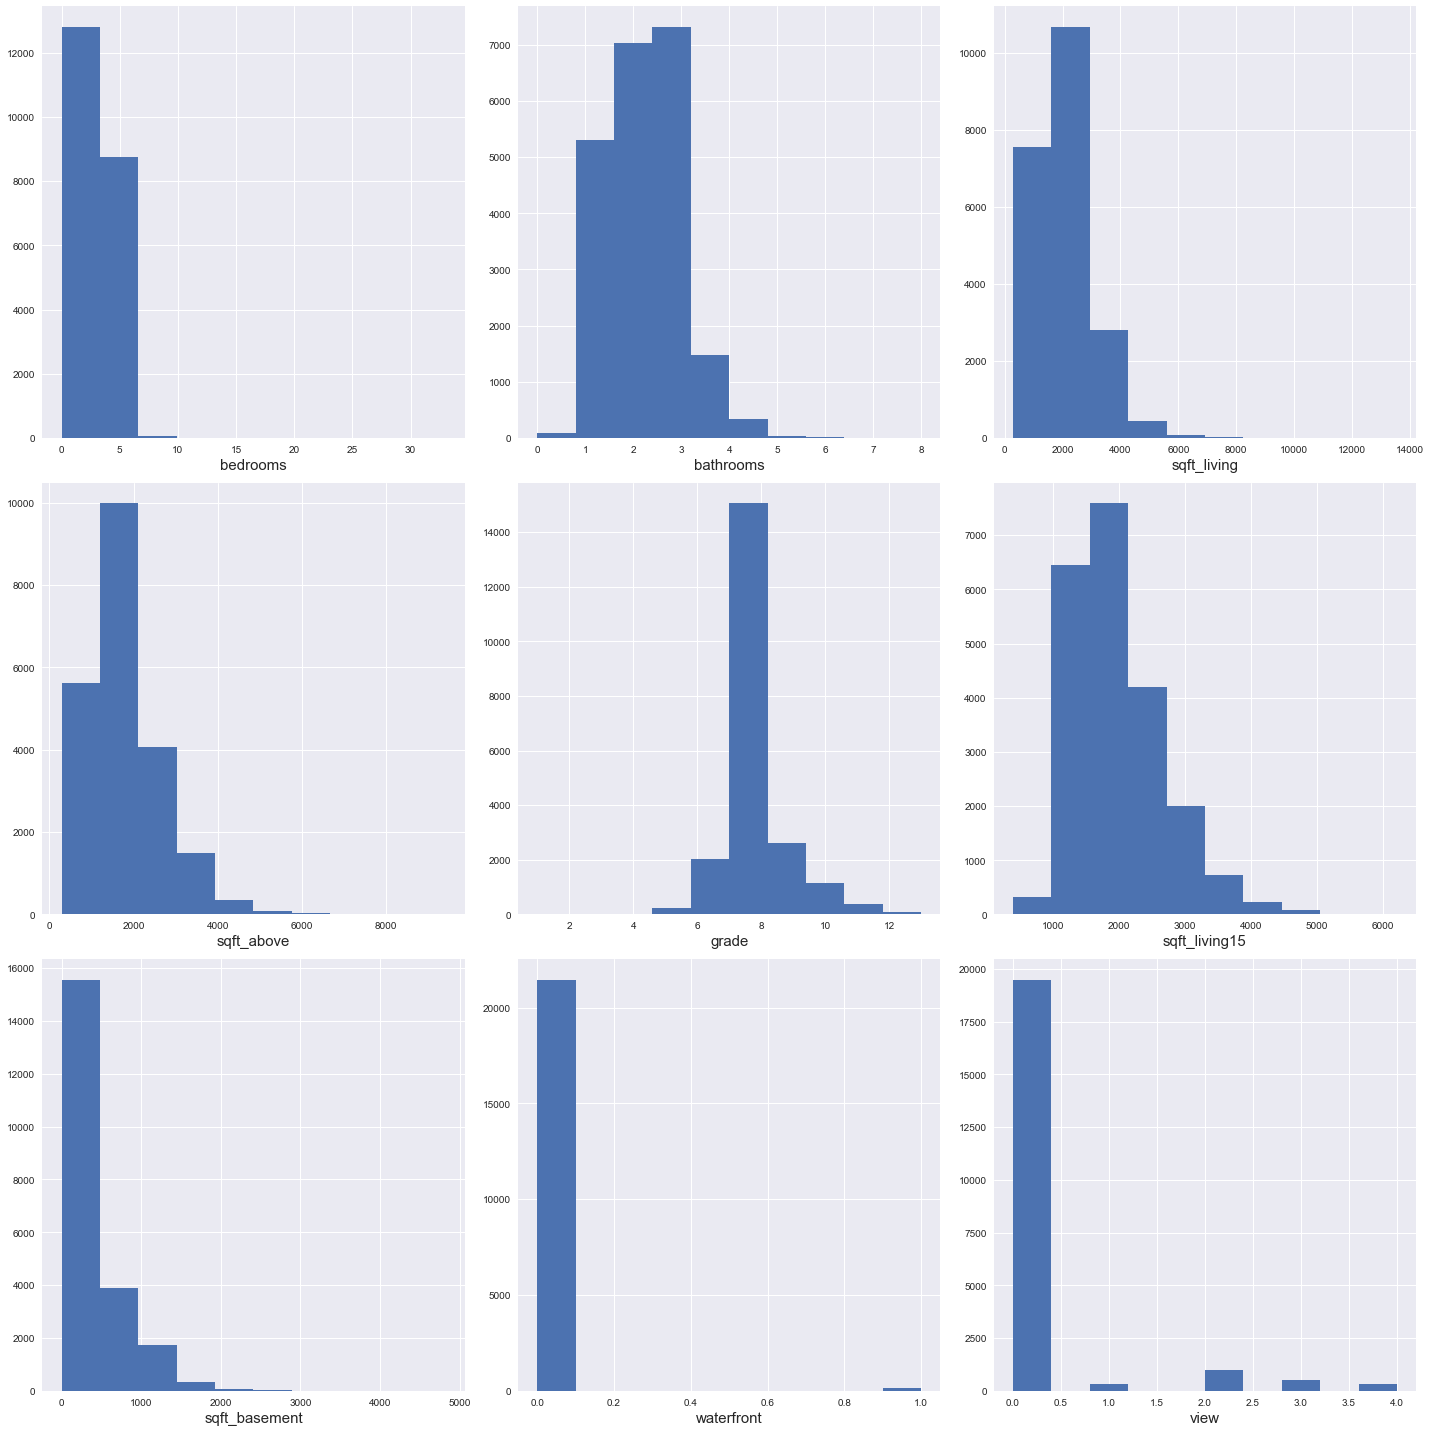

In [493]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(331)
ax1.hist(df.bedrooms)
ax1.set_xlabel('bedrooms', fontsize = 15)

#2
ax2 = fig.add_subplot(332)
ax2.hist(df.bathrooms)
ax2.set_xlabel('bathrooms', fontsize = 15)

#3
ax3 = fig.add_subplot(333)
ax3.hist(df.sqft_living)
ax3.set_xlabel('sqft_living', fontsize = 15)

#4
ax4 = fig.add_subplot(334)
ax4.hist(df.sqft_above)
ax4.set_xlabel('sqft_above', fontsize = 15)

#5
ax5 = fig.add_subplot(335)
ax5.hist(df.grade)
ax5.set_xlabel('grade', fontsize = 15)

#6
ax6 = fig.add_subplot(336)
ax6.hist(df.sqft_living15)
ax6.set_xlabel('sqft_living15', fontsize = 15)

#7
ax7 = fig.add_subplot(337)
ax7.hist(df.sqft_basement)
ax7.set_xlabel('sqft_basement', fontsize = 15)

#8
ax8 = fig.add_subplot(338)
ax8.hist(df.waterfront)
ax8.set_xlabel('waterfront', fontsize = 15)

#9
ax9 = fig.add_subplot(339)
ax9.hist(df.view)
ax9.set_xlabel('view', fontsize = 15)


plt.tight_layout()
fig.savefig('House_price_hist.png')

In [494]:
df['Age'] = 2017 - df.yr_built
df = df.drop('yr_built',1)
df['Basement_or_not'] =  df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

df['renovated_or_not'] =  df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

df = df.drop('sqft_basement',1)

df = df.drop('yr_renovated',1)

df = df[(df.bedrooms < 6) & (df.bedrooms > 0)]

df = df[(df.bathrooms < 5) & (df.bathrooms >= 1)]

df['bath_new'] = df['bathrooms']*2

df = df.drop('bathrooms',1)

df = df[(df.sqft_living <= 4000) & (df.sqft_living > 500)]

df = df[(df.sqft_above <= 4000) & (df.sqft_above > 500)]

df = df[(df.sqft_living15 <= 3500) & (df.sqft_living15 > 1000)]

df =df[df.floors <= 3]

df = df[(df.grade > 5) & (df.grade < 11)]

df = df[(df['Age'] < 80) & (df['price'] < 800000 ) & (df['price'] >= 150000 )]
df.shape

(15236, 14)

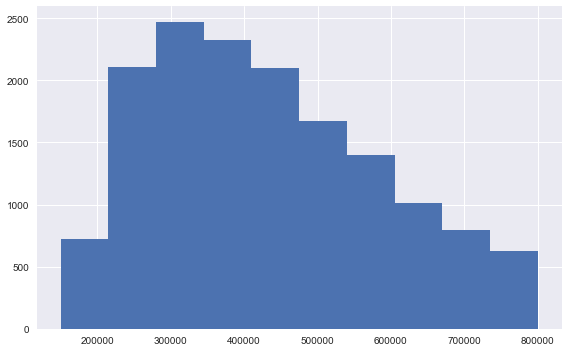

In [495]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
plt.hist(df.price)
plt.tight_layout()

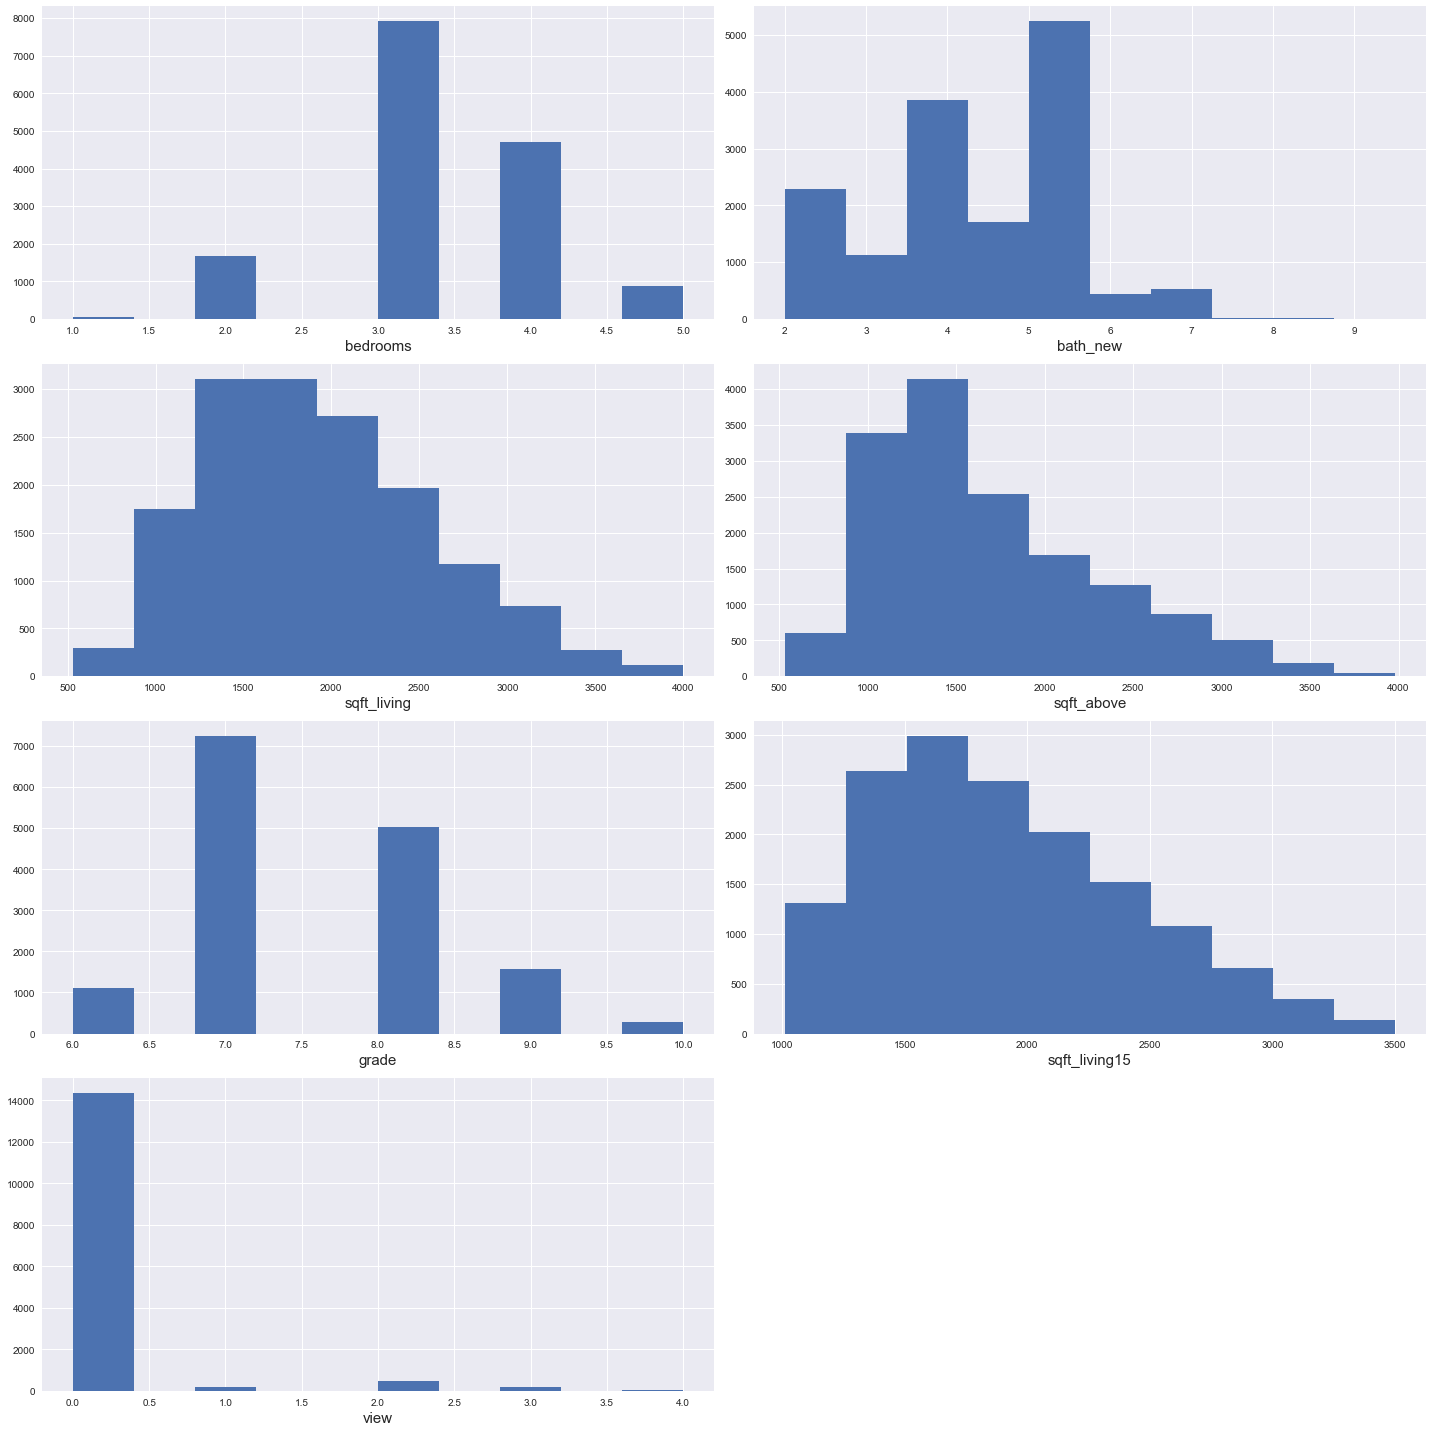

In [496]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(421)
ax1.hist(df.bedrooms)
ax1.set_xlabel('bedrooms', fontsize = 15)


#2
ax2 = fig.add_subplot(422)
ax2.hist(df.bath_new)
ax2.set_xlabel('bath_new', fontsize = 15)


#3
ax3 = fig.add_subplot(423)
ax3.hist(df.sqft_living)
ax3.set_xlabel('sqft_living', fontsize = 15)


#4
ax4 = fig.add_subplot(424)
ax4.hist(df.sqft_above)
ax4.set_xlabel('sqft_above', fontsize = 15)


#5
ax5 = fig.add_subplot(425)
ax5.hist(df.grade)
ax5.set_xlabel('grade', fontsize = 15)


#6
ax6 = fig.add_subplot(426)
ax6.hist(df.sqft_living15)
ax6.set_xlabel('sqft_living15', fontsize = 15)

#7
ax7 = fig.add_subplot(427)
ax7.hist(df.view)
ax7.set_xlabel('view', fontsize = 15)



plt.tight_layout()


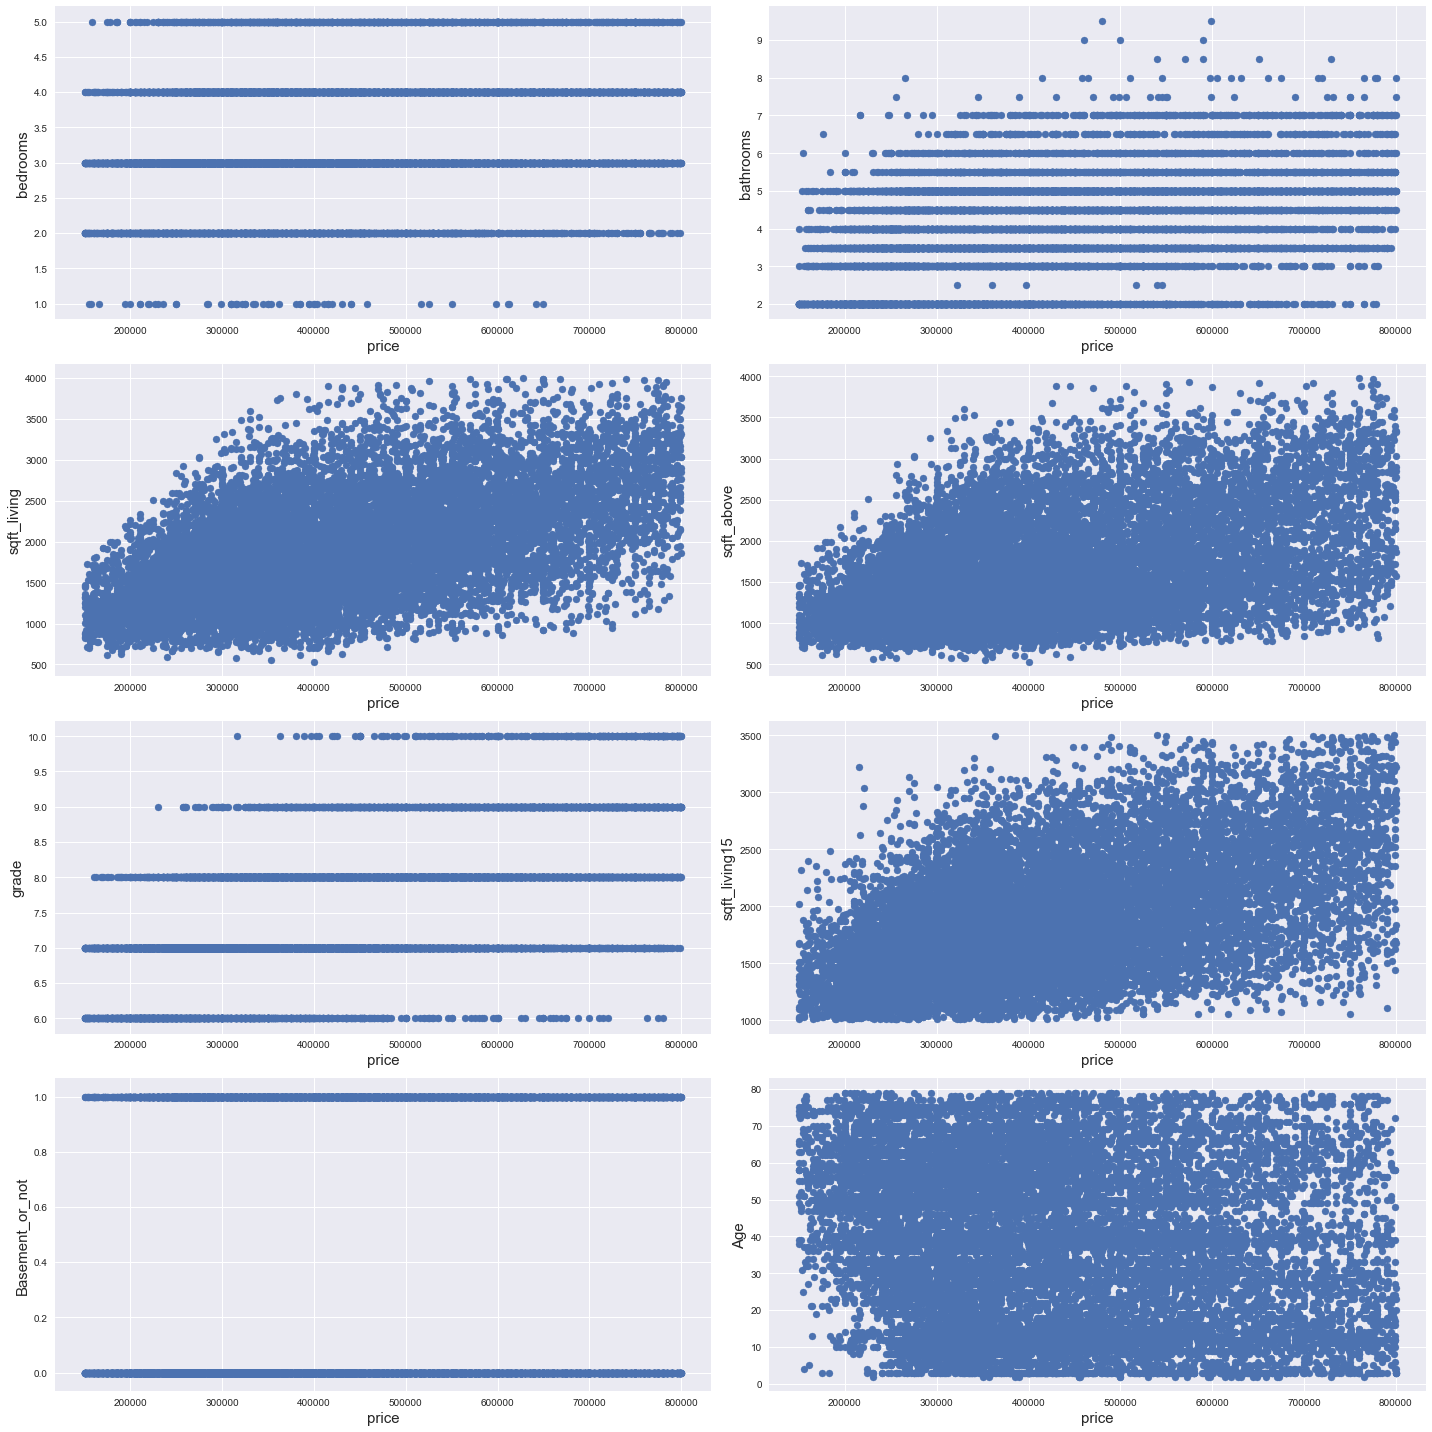

In [497]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(421)
ax1.scatter(df.price,df.bedrooms)
ax1.set_ylabel('bedrooms', fontsize = 15)
ax1.set_xlabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(422)
ax2.scatter(df.price,df.bath_new)
ax2.set_ylabel('bathrooms', fontsize = 15)
ax2.set_xlabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(423)
ax3.scatter(df.price,df.sqft_living)
ax3.set_ylabel('sqft_living', fontsize = 15)
ax3.set_xlabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(424)
ax4.scatter(df.price,df.sqft_above)
ax4.set_ylabel('sqft_above', fontsize = 15)
ax4.set_xlabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(425)
ax5.scatter(df.price,df.grade)
ax5.set_ylabel('grade', fontsize = 15)
ax5.set_xlabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(426)
ax6.scatter(df.price,df.sqft_living15)
ax6.set_ylabel('sqft_living15', fontsize = 15)
ax6.set_xlabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(427)
ax7.scatter(df.price,df.Basement_or_not)
ax7.set_ylabel('Basement_or_not', fontsize = 15)
ax7.set_xlabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(428)
ax8.scatter(df.price,df.Age)
ax8.set_ylabel('Age', fontsize = 15)
ax8.set_xlabel('price', fontsize = 15)



plt.tight_layout()


In [498]:
print(df.zipcode.nunique())
print(df.bedrooms.value_counts())

70
3    7916
4    4714
2    1674
5     875
1      57
Name: bedrooms, dtype: int64


In [499]:
df_zipcode = pd.get_dummies(df['zipcode'],drop_first = True)
df = pd.concat([df,df_zipcode],axis =1)
df.describe()

,price,bedrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,...,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000,15236.000000
mean,430197.494815,3.306905,1917.842807,1.476175,0.001510,0.125952,7.518903,1672.959373,1899.039709,98073.700971,...,0.013783,0.003282,0.026385,0.012799,0.012864,0.012339,0.013455,0.007679,0.015949,0.011027
std,154627.142412,0.754851,637.357742,0.557130,0.038825,0.539195,0.845675,625.702969,521.727470,53.944429,...,0.116594,0.057194,0.160282,0.112408,0.112693,0.110398,0.115216,0.087297,0.125283,0.104430
min,150000.000000,1.000000,530.000000,1.000000,0.000000,0.000000,6.000000,530.000000,1010.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,305000.000000,3.000000,1430.000000,1.000000,0.000000,0.000000,7.000000,1200.000000,1490.000000,98030.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,409000.000000,3.000000,1840.000000,1.000000,0.000000,0.000000,7.000000,1510.000000,1820.000000,98058.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,540000.000000,4.000000,2340.000000,2.000000,0.000000,0.000000,8.000000,2050.000000,2242.000000,98117.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,799990.000000,5.000000,4000.000000,3.000000,1.000000,4.000000,10.000000,3980.000000,3500.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [500]:
X = df.iloc[:,1:]
X.head()

,bedrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,zipcode,Age,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1180,1.0,0,0,7,1180,1340,98178,62,...,0,0,0,0,0,0,1,0,0,0
1,3,2570,2.0,0,0,7,2170,1690,98125,66,...,0,0,0,0,0,0,0,0,0,0
3,4,1960,1.0,0,0,7,1050,1360,98136,52,...,0,0,0,0,0,0,0,0,0,0
4,3,1680,1.0,0,0,8,1680,1800,98074,30,...,0,0,0,0,0,0,0,0,0,0
6,3,1715,2.0,0,0,7,1715,2238,98003,22,...,0,0,0,0,0,0,0,0,0,0


In [501]:
y = df['price']
y.head()

0    221900.0
1    538000.0
3    604000.0
4    510000.0
6    257500.0
Name: price, dtype: float64

In [502]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 0)

In [503]:
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
y_pred_lasso = lassoreg.predict(X_test)

C:\Users\Arjun\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [504]:
from sklearn.metrics import mean_squared_error
RMSE_lasso_test = mean_squared_error(y_test,y_pred_lasso)**0.5
print(RMSE_lasso_test)

65158.7583999


In [505]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_test,y_pred_lasso)
R_squared

0.82062600864477009